In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#Call data  and target
#image data format 28 x 28 = 784
X = mnist['data']
y = mnist['target']

print("X: ", X.shape)
print("y: ", y.shape)

X:  (70000, 784)
y:  (70000,)


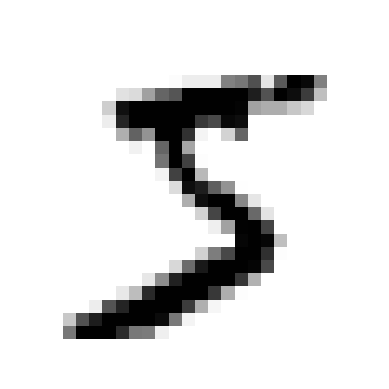

In [15]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
y = y.astype(np.uint8)

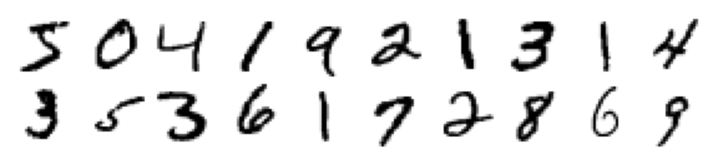

In [21]:
%matplotlib inline 
def plot_digit(data):
 image = data.reshape(28, 28)
 plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
 plt.axis("off")
 
def plot_digits(instances, image_per_row):
   size = 28
   image_per_row = min(len(instances), image_per_row)
   n_row = (len(instances)-1) // image_per_row + 1
   n_empty = n_row * image_per_row - len(instances)
   padded_instances = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)

# 배열의 크기를 28 x 28 이미지 그리드로 변경 
   image_grid = padded_instances.reshape((n_row, image_per_row, size, size ))

 # transpose (samples, image_per_row , row, cols) into (samples, rows, image_per_row, cols),
   big_image = image_grid.transpose(0,2,1,3).reshape(n_row*size, image_per_row*size)

   plt.imshow(big_image, cmap=mpl.cm.binary)
   plt.axis('off')


#
plt.figure(figsize=(9,9))
example_images = X[:20]
plot_digits(example_images, image_per_row=10)


plt.show()

In [22]:
X_train, X_test, y_train, y_test = X[:56000], X[56000:], y[:56000], y[56000:]

In [24]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_test_5

array([False, False,  True, ..., False,  True, False])

In [27]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([X[0]])

array([ True])

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95955429, 0.96083999, 0.95665917])

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1]) # precision 

recall_score(y_train_5, y_train_pred)
cm[1, 1] / (cm[1,0] + cm[1, 1]) # recall

f1_score(y_train_5, y_train_pred)


0.6946640316205533

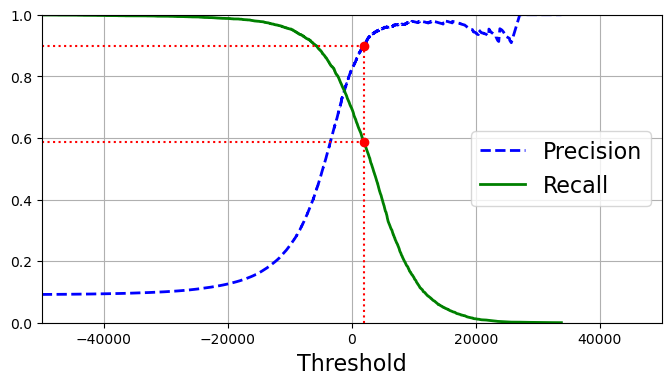

In [39]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
                                           # Not shown
plt.show()

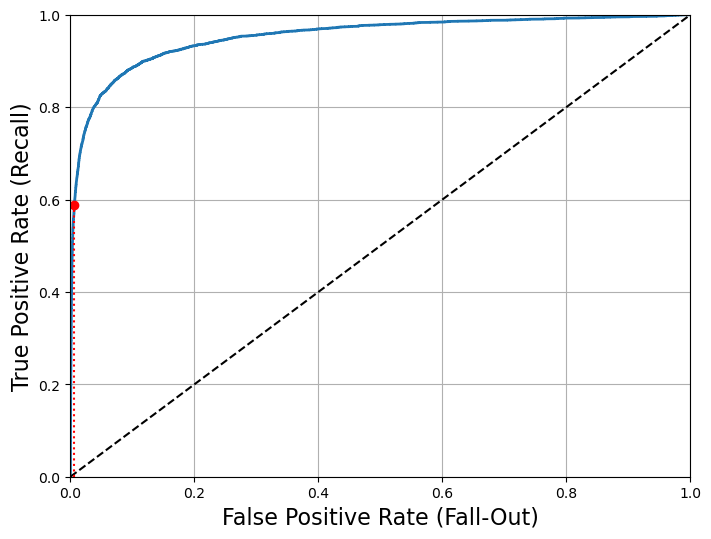

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
                                   # Not shown
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9530898127068813